# Clustering (Customer Segments using K-Means Algorithm) 

#### Oleh :
#### Kelompok Dilema_trus    
#### (12S16009) Ratna Kasmala Hutapea 
#### (12S16015) Ari Whuandaniel Manurung 
#### (12S16031) Yolanda S. Nainggolan 
#### (12S16053) Angelia Khaterin Sibarani 

# --------------------------------------------------------------------------------------------------------------
#### Tujuan dari pengerjaan proyek ini adalah membuat Customer Segments dari data German Credit Data dengan menggunakan model Clustering (K-Means) dan menerapkan framework datamining CRISP-DM untuk mengetahui karakteristik costumer sebagai resiko kredit baik atau buruk sesuai dengan attribute yang ditetentukan bank maka costumer segments yang diperoleh dapat digunakan untuk menentukan kelayakan kredit dari peminjam. Penelitian ini juga bertujuan memberikan tampilan hasil segmentasi dalam bentuk visualisasi untuk memudahkan membaca hasil Clustering.
# ---------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

#### Age (numeric) 
#### Sex (text: male, female)
#### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#### Housing (text: own, rent, or free)
#### Saving accounts (text - little, moderate, quite rich, rich)
#### Checking account (numeric, in DM - Deutsch Mark)
#### Credit amount (numeric, in DM)
#### Duration (numeric, in month)
#### Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [2]:
df = pd.read_csv("D:/Downloads/2 Proyek_DAMI/german_credit_data.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.shape

(1000, 10)

In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count())\
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x * 100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]
# dari data yang kosong itu, hitung berapa persen nilai null tiap kolom

,Total,Missing Percent
Checking account,394,39.4
Saving accounts,183,18.3


In [9]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']

In [10]:
df = df.drop(columns = unused)
df.shape

(1000, 9)

In [11]:
# cek nilai yang unik
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [12]:
print("Unique values in each categorical column:\n")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:

Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [13]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])
# mengisi nilai null

In [14]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

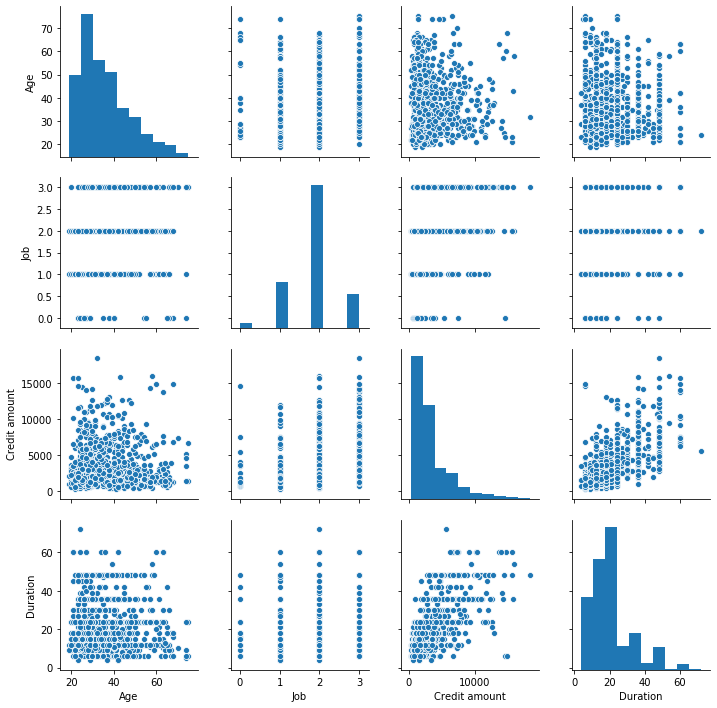

In [15]:
sns.pairplot(df)

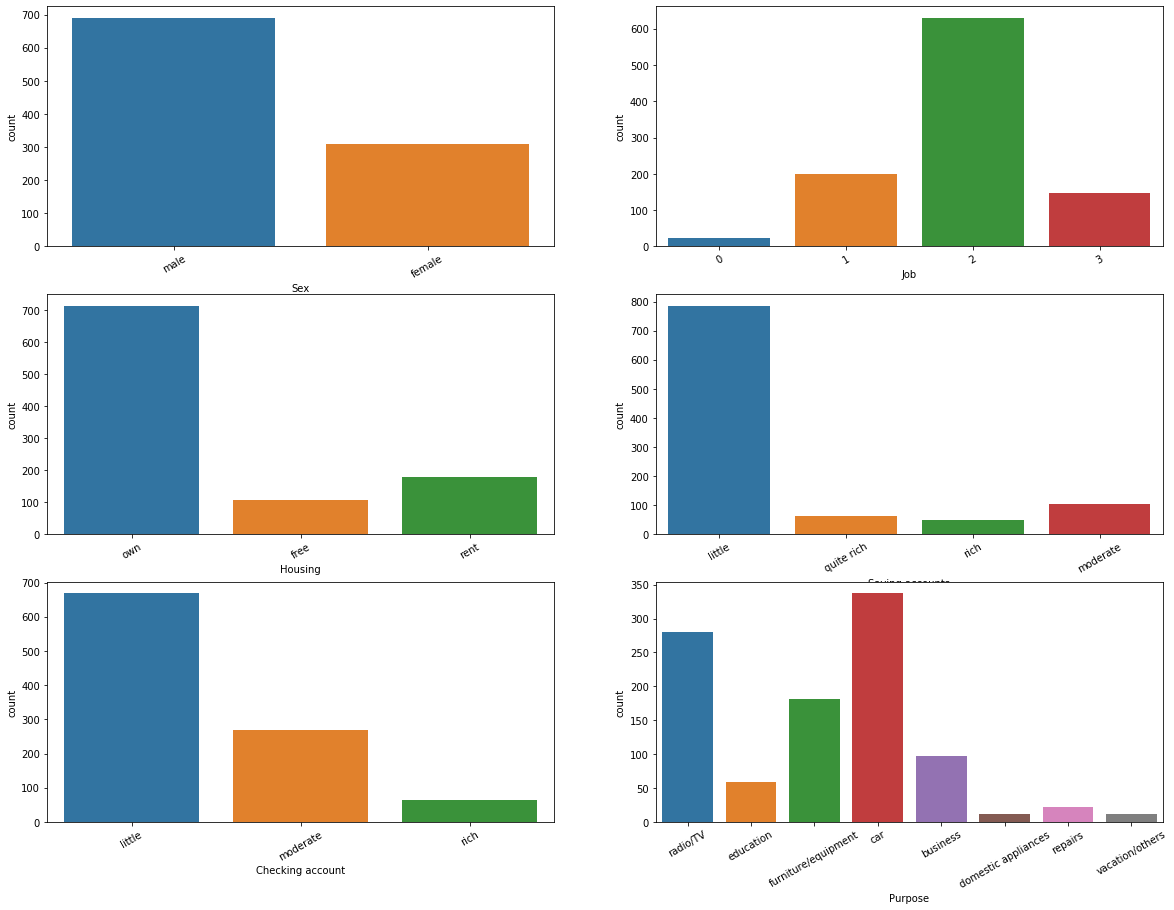

In [16]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()
#Cek jumlah Setiap variable

#### Di atas adalah bar plot semua fitur kategorikal. Dari plot bar di atas, kita bisa mendapatkan beberapa wawasan. Yaitu:

#### Jumlah pria lebih besar dari wanita
#### Sebagian besar pelanggan terampil dalam pekerjaan mereka
#### Sebagian besar pelanggan memiliki rumah sendiri
#### Sebagian besar pelanggan memiliki sedikit tabungan
#### Sebagian besar pelanggan memiliki sedikit rekening giro
#### Sebagian besar pelanggan menggunakan kredit untuk mobil


#### The amount of men are greater than women
#### Sebagian besar customer are skilled on their job
#### Sebagian besar customer have their own house
#### Sebagian besar customer have little saving account
#### Sebagian besar customer hav little checking account
#### Sebagian besar customer use credit for car

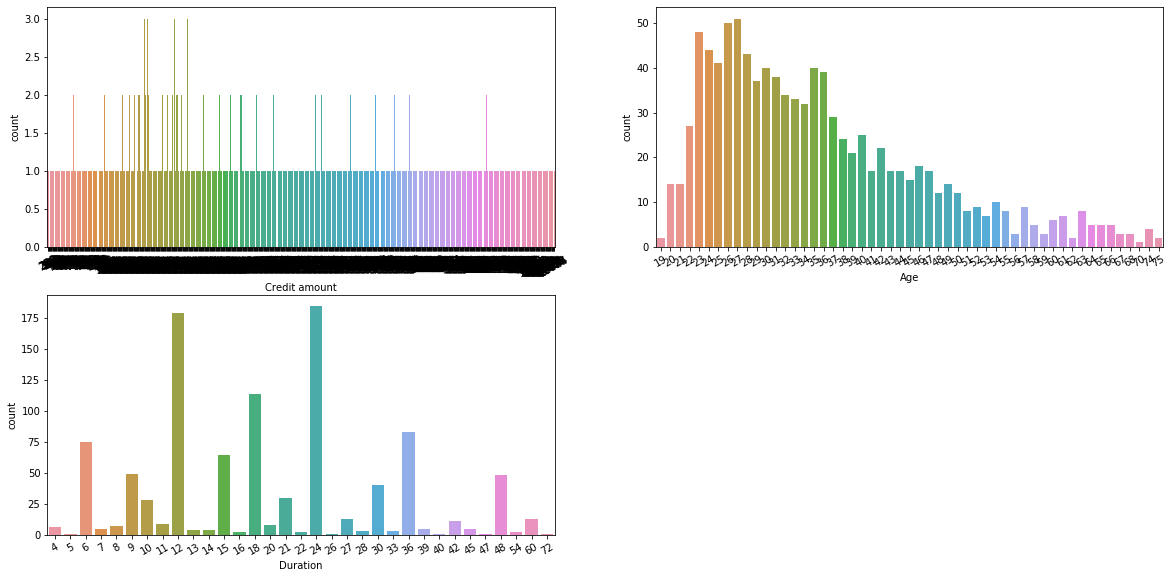

In [17]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()
#Cek jumlah Setiap variable

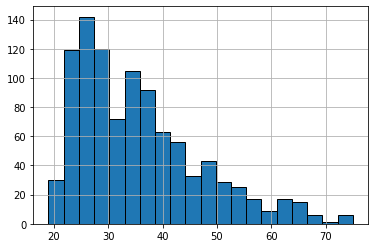

In [18]:
# mencek diusia tertentu berapa banyak orang yang memiliki usia tertentu
df['Age'].hist(edgecolor='black', bins=20);

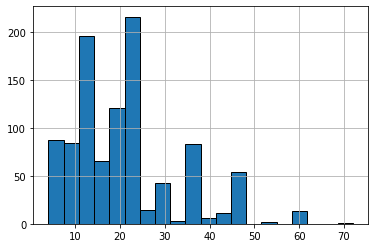

In [19]:
# mencek diusia tertentu berapa banyak orang yang memiliki usia tertentu
df['Duration'].hist(edgecolor='black', bins=20);

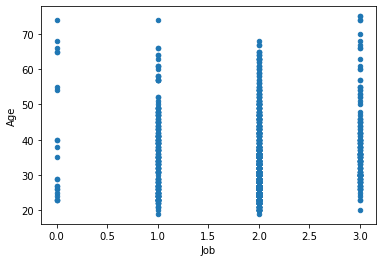

In [20]:
df.plot.scatter(x='Job', y='Age');
#yang unurnya 30 ada yang tidak memiliki pekerjaan/pekerjaannya bernilai 1 dll

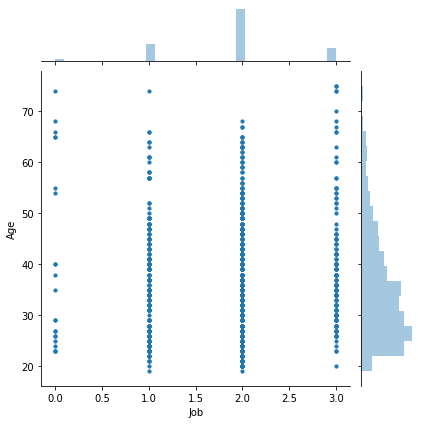

In [21]:
sns.jointplot(x='Job', y='Age', data=df, joint_kws={"s":10});

#### data yang akan dilakukan clustering adalah kolom dengan nilai numerik dan hanya ada 3 yaitu:
#### Credit amount
#### Duration
#### Age

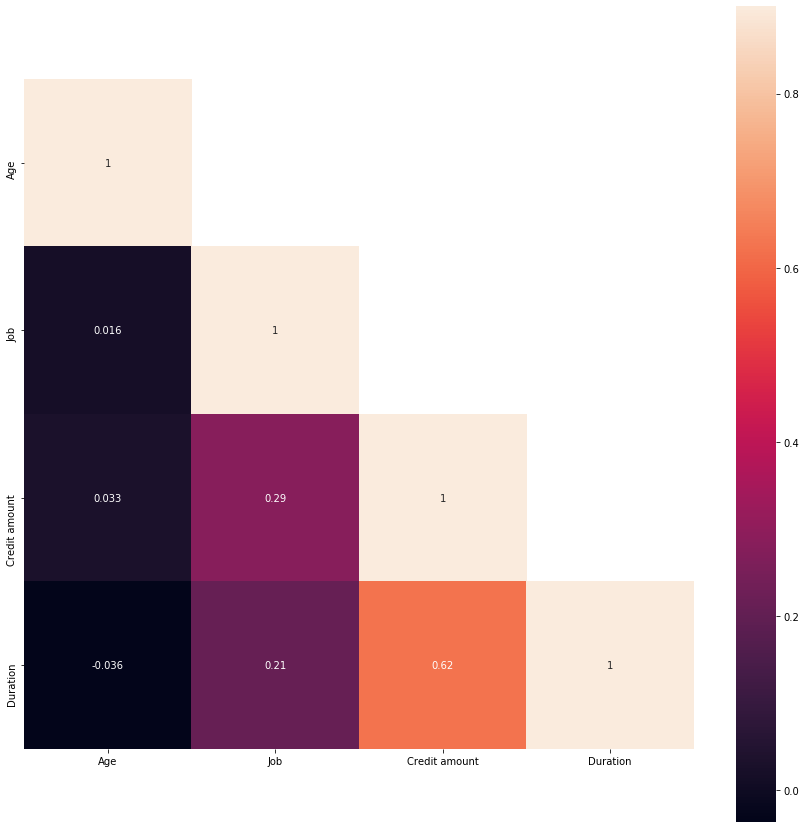

In [22]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

# untuk relasi yang paling mwndwkati satu maka nilai yang paling cocok unutk dilihat clusternya

In [23]:
def scatters(df, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,16))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

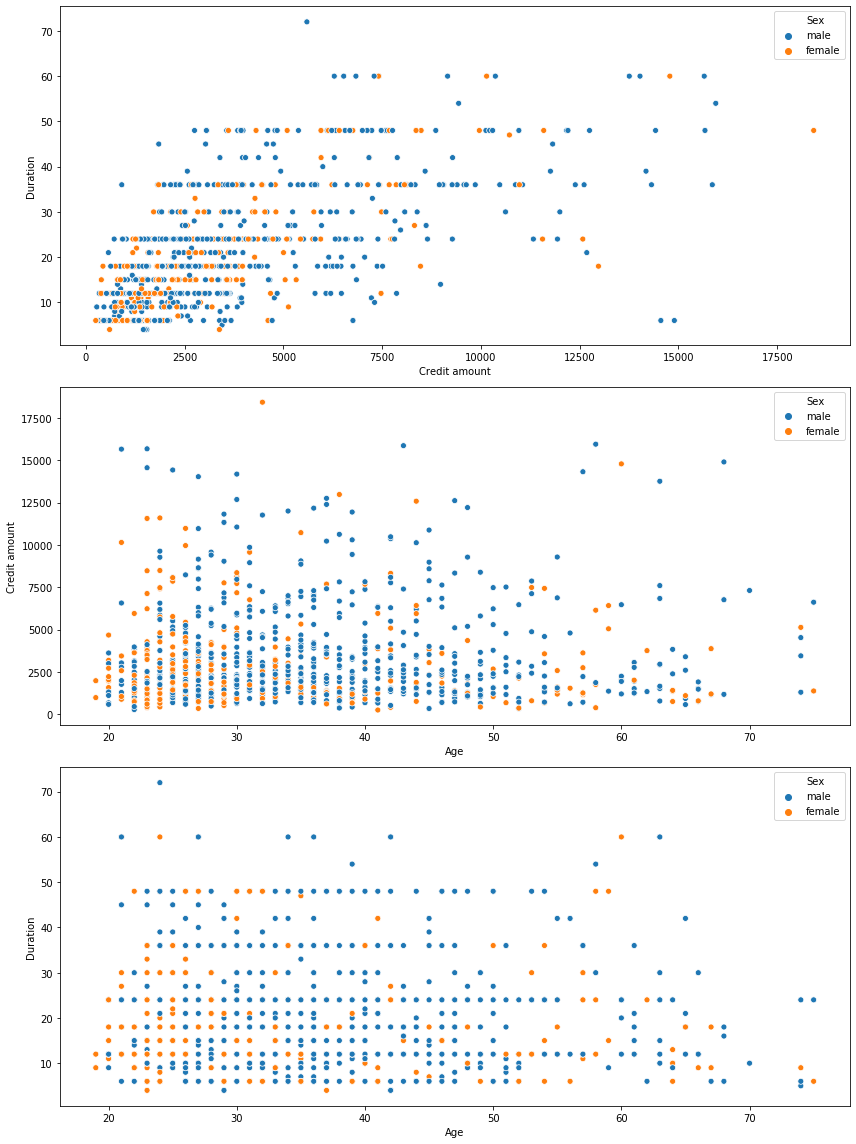

In [24]:
scatters(df, h="Sex")

#### Kesan umum adalah bahwa wanita cenderung lebih muda daripada pria, 

#### 1.namun, plot utama menunjukkan bahwa tidak ada perbedaan yang jelas antara pria dan wanita dalam hal Credit Amount dan Duration kredit.
#### 2. Untuk Credit Amount dan Age tidak ada perbedaan yang jelas antara pria dan wanita 
#### 3. Untuk Duration dan Age tidak ada perbedaan yang jelas antara pria dan wanita


#### linear correlation between credit amount and duration

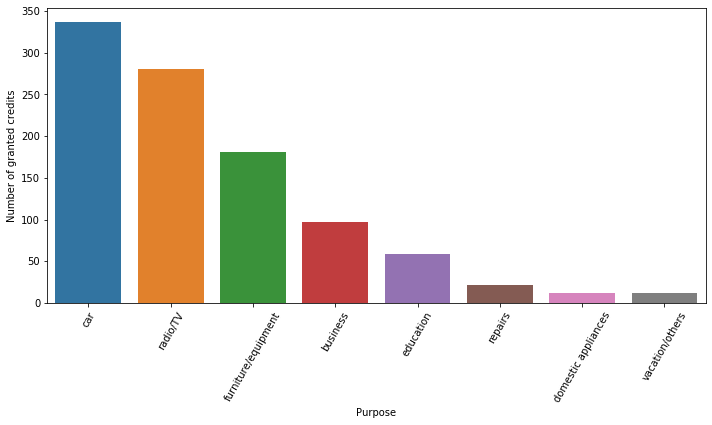

In [25]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

Barplot di atas menunjukkan berapa banyak kredit yang diberikan untuk berbagai keperluan. Sebagian besar kredit diberikan untuk mobil dan radio / TV.

Sekarang akan menghasilkan boxplots untuk analisis terperinci dari variabel kategori.

In [26]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

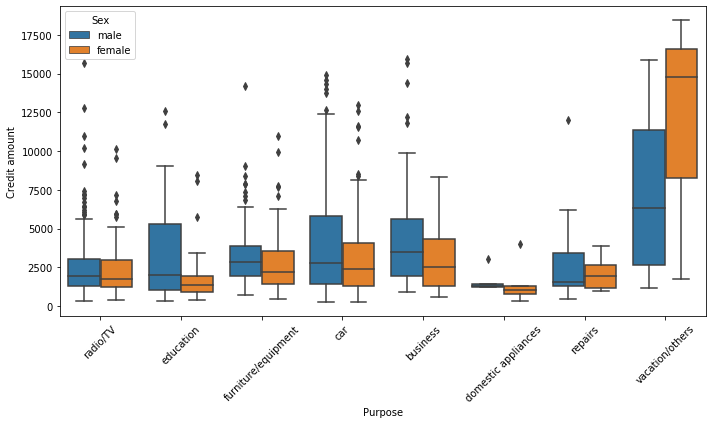

In [27]:
boxes("Purpose","Credit amount","Sex")

informasi yang kita peroleh: 
#### 1.Plot di atas menunjukkan bahwa jumlah terbesar diambil untuk vacations/others, yang terkecil untuk domestic appliances..
#### 2.Sebagian besar kita melihat bahwa data pada sumbu X (Purpose) memiliki outlier di sisi atas kotak (jumlah yang lebih tinggi). 
#### 3.Dalam sebagian besar kasus tidak ada perbedaan antara pria dan wanita, meskipun kategori vacation/others. Tetapi orang harus ingat bahwa sangat sedikit jumlah kredit yang diberikan dalam kategori ini.

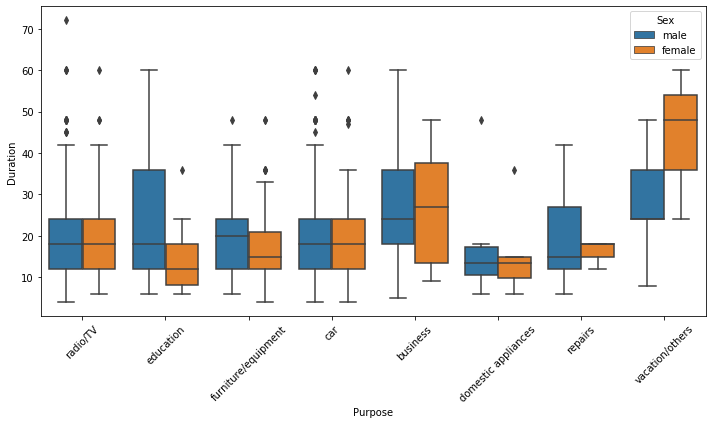

In [28]:
boxes("Purpose","Duration","Sex")

#### Informasi yang kita eroleh adalah:

#### 1.Boxplot di atas menunjukkan bahwa secara umum tidak ada perbedaan dalam durasi kredit antara pria dan wanita. 
#### 2.tidak terdapat juga tren yang jelas antara kategori dengan pengamatan bahwa durasi terpendek adalah untuk peralatan rumah tangga. Masuk akal karena sesuai dengan wawasan dari grafik sebelumnya (jumlah kredit) - dalam kategori ini, ada jumlah kredit terendah.

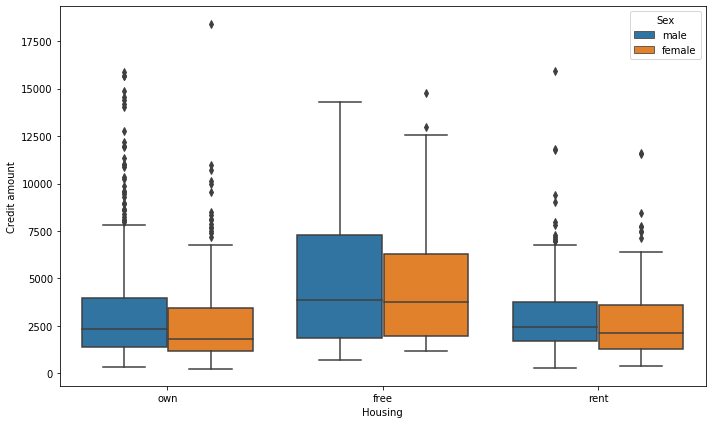

In [29]:
boxes("Housing","Credit amount","Sex",r=0)

Dalam hal kategori perumahan, tidak ada perbedaan besar meskipun orang yang memiliki rumah "bebas" cenderung mengambil jumlah kredit yang sedikit lebih besar.

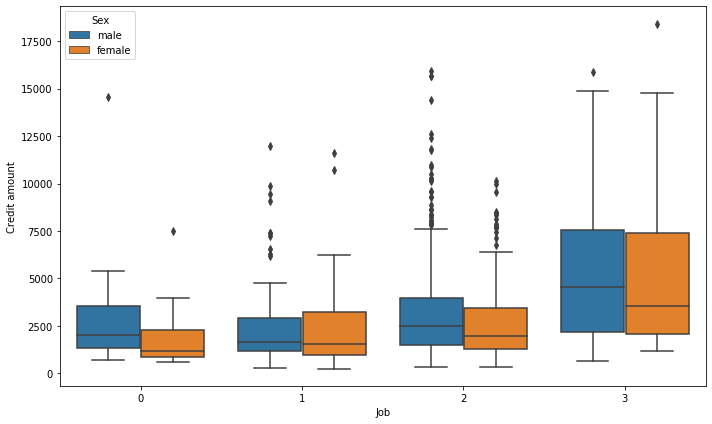

In [30]:
boxes("Job","Credit amount","Sex",r=0)

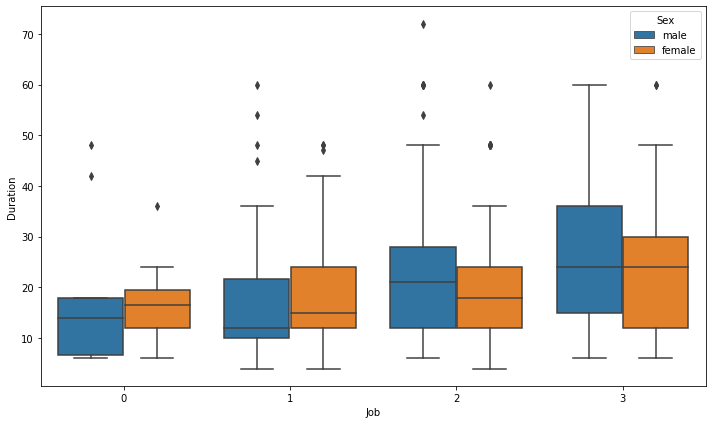

In [31]:
boxes("Job","Duration","Sex",r=0)

Dalam hal kategori pekerjaan sekali lagi tidak ada perbedaan antara pria dan wanita, tetapi kita dapat melihat bahwa kategori pekerjaan 3 cenderung mengambil jumlah kredit yang lebih besar untuk durasi yang lebih lama.

Dan pada akhirnya jika seseorang menyukai plot 3D di sini Anda pergi.

Text(0.5, 0, 'Age')

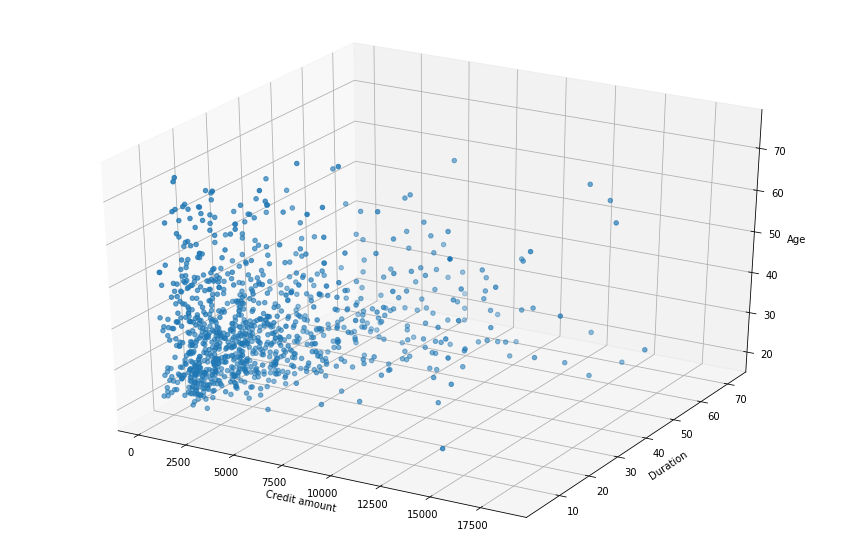

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

Dari angka-angka di atas kita dapat melihat bahwa masih ada beberapa outlier pada fitur numerik.

In [48]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

In [49]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

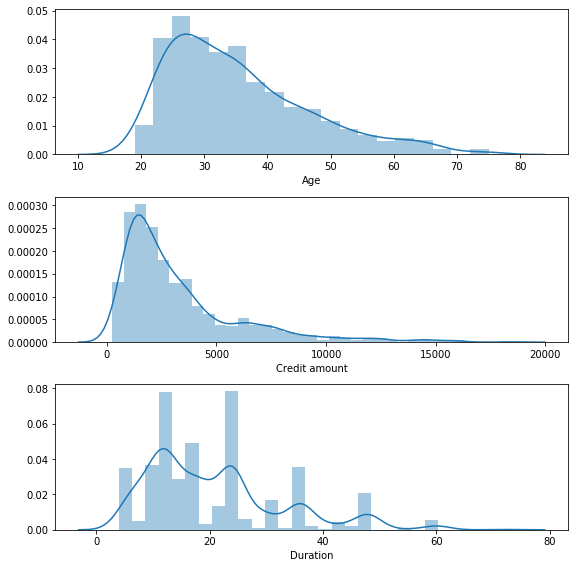

In [35]:
distributions(cluster_data)

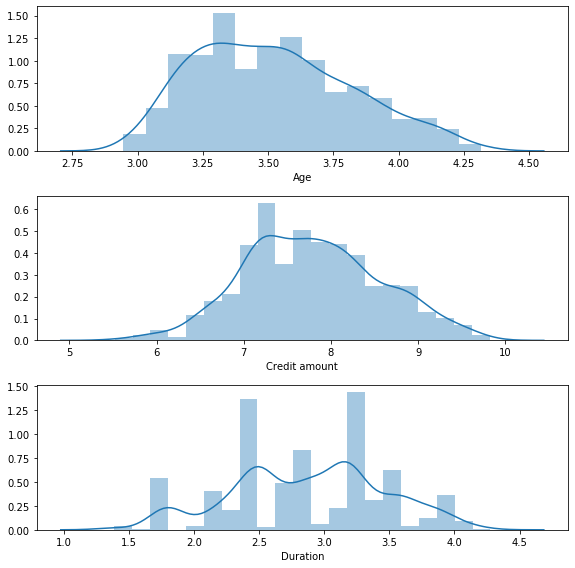

In [36]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

Kita dapat melihat bahwa kemiringan distribusi dihilangkan.

In [37]:
cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

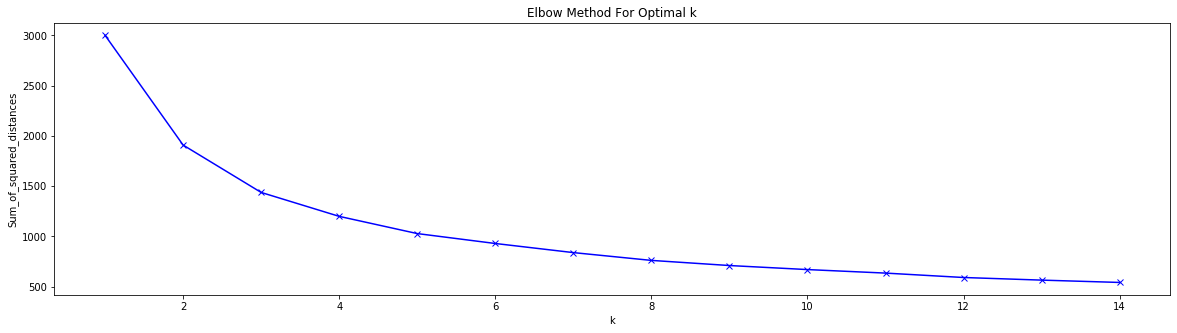

In [39]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

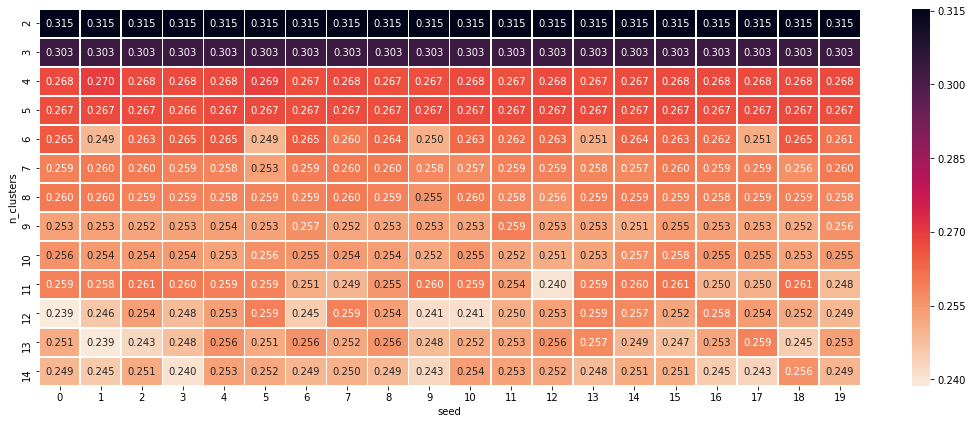

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

Peta panas di atas menunjukkan skor siluet untuk berbagai kombinasi keadaan acak dan jumlah cluster. Skor tertinggi adalah untuk 2 dan 3 kelompok dan mereka relatif tidak sensitif terhadap benih.

Saya akan memilih 3 cluster untuk mendapatkan lebih banyak wawasan tentang data.

In [50]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

Di bawah ini saya akan membuat grafik siluet untuk 3 kluster untuk menggambarkan secara visual setiap titik di dalam klusternya sendiri (kode yang dimodifikasi dari scikit-learn doc).

In [42]:
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(cluster_scaled)
    clusters = kmeans.predict(cluster_scaled)
    silhouette_avg = silhouette_score(cluster_scaled, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.302902483090709
For n_clusters = 4 The average silhouette_score is : 0.26708657472464076
For n_clusters = 5 The average silhouette_score is : 0.2674532039229961
For n_clusters = 6 The average silhouette_score is : 0.24986997581873346
For n_clusters = 7 The average silhouette_score is : 0.2598158427672041
For n_clusters = 8 The average silhouette_score is : 0.2598120613007504
For n_clusters = 9 The average silhouette_score is : 0.2527963069477885


In [43]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.302902483090709


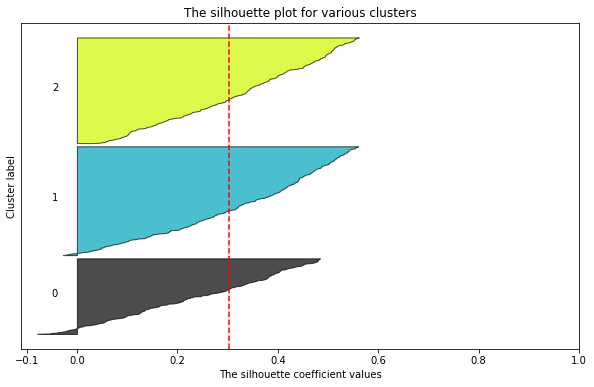

In [44]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

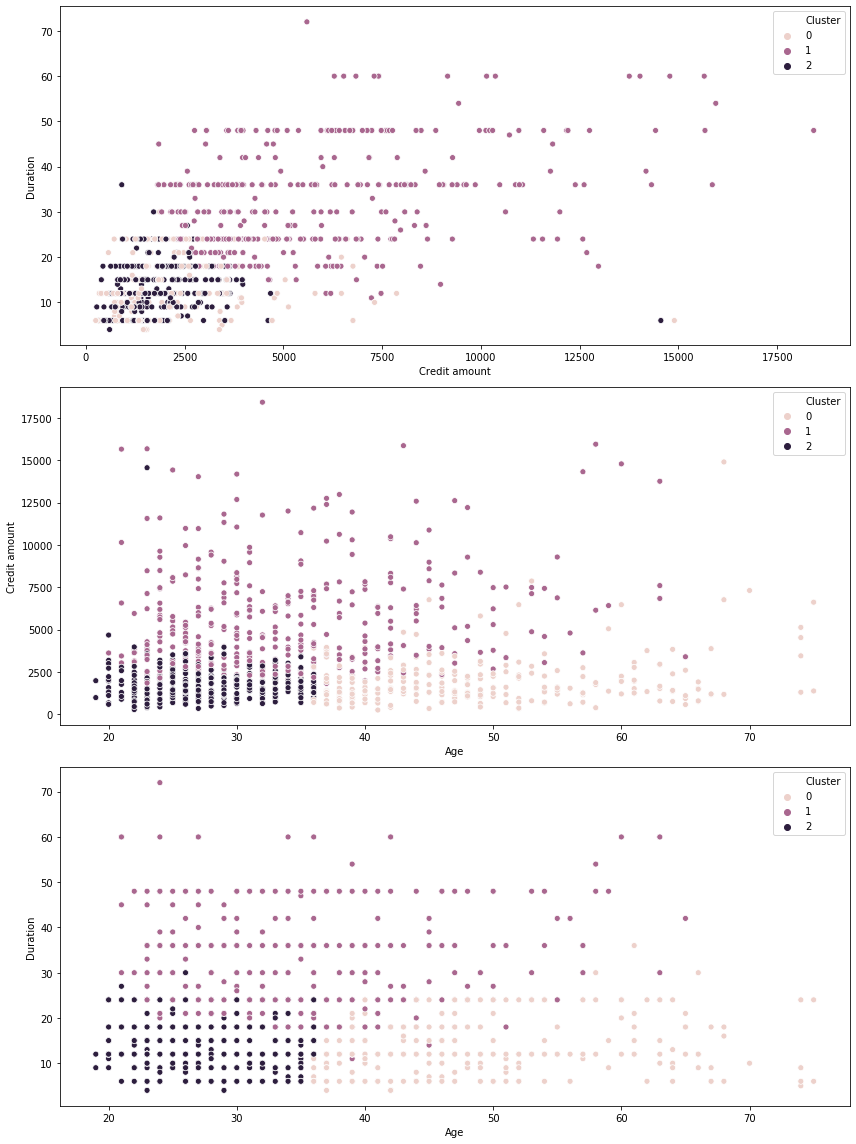

In [45]:
scatters(clustered_data, 'Cluster')

In [53]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.6,1970.5,13.9
1,34.0,5665.4,32.2
2,27.7,1737.5,14.3


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Credit amount'],df_cluster['Age'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Credit Amount', linespacing=3.2)
yLabel = ax.set_ylabel('Age', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

### Cluster 0 – lower mean of credit amount, short duration, older customers

### Cluster 1 – high mean of credit amount, long duration, middle-aged customers

### Cluster 2 - lower mean of credit amount, short duration, young customers